In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
!pip install sklearn

In [3]:
heart_df = pd.read_csv('datasets/heart.csv')

In [4]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
heart_df.shape

(303, 14)

In [7]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
heart_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
sns.set_theme(palette="Accent") # changing the color palette for fun

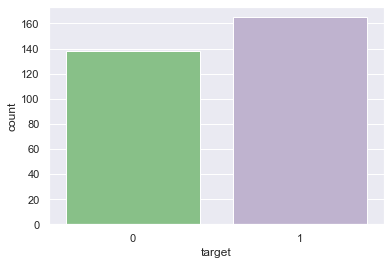

In [10]:
ax = sns.countplot(x="target", data=heart_df)

In [11]:
heart_df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

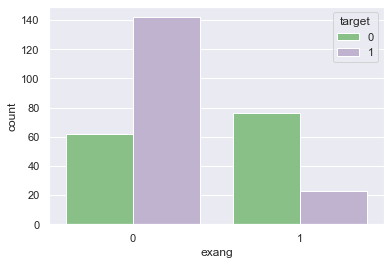

In [16]:
ax = sns.countplot(x = 'exang', data = heart_df, hue = 'target')

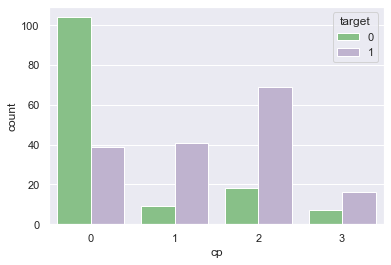

In [14]:
ax = sns.countplot(x = 'cp', data = heart_df, hue = 'target')

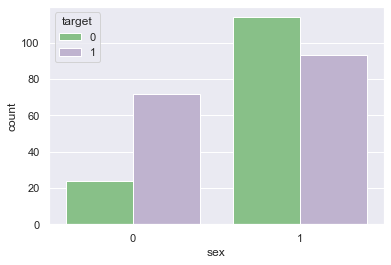

In [18]:
ax = sns.countplot(x = 'sex', data = heart_df, hue = 'target')

In [19]:
x = heart_df.drop(['target'], axis = 1) # we will use all columns except 'class'
y = heart_df['target'] # this is our target value

In [20]:
x.shape, y.shape

((303, 13), (303,))

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.50)

In [23]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((151, 13), (152, 13), (151,), (152,))

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
model = DecisionTreeClassifier() # initialize our model

In [26]:
model.fit(x, y)

DecisionTreeClassifier()

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
y_predictions = model.predict(x)

In [29]:
accuracy_score(y_predictions, y)

1.0

In [30]:
model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [31]:
y_predictions = model.predict(xtest)
accuracy_score(y_predictions, ytest)

0.7171052631578947

In [32]:
from sklearn import tree

[Text(170.74800000000002, 203.85, 'X[12] <= 2.5\ngini = 0.499\nsamples = 151\nvalue = [73, 78]'),
 Text(73.656, 176.67000000000002, 'X[7] <= 147.0\ngini = 0.375\nsamples = 92\nvalue = [23, 69]'),
 Text(26.784000000000002, 149.49, 'X[3] <= 111.0\ngini = 0.488\nsamples = 26\nvalue = [15, 11]'),
 Text(13.392000000000001, 122.31, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(40.176, 122.31, 'X[2] <= 0.5\ngini = 0.408\nsamples = 21\nvalue = [15, 6]'),
 Text(26.784000000000002, 95.13, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(53.568000000000005, 95.13, 'X[0] <= 61.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(40.176, 67.94999999999999, 'X[2] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(26.784000000000002, 40.77000000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(53.568000000000005, 40.77000000000001, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(66.96000000000001, 67.94999999999999, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(120.528, 1

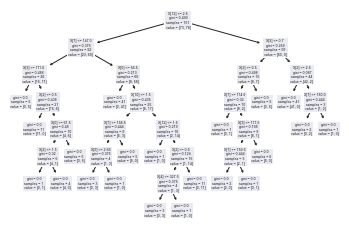

In [33]:
tree.plot_tree(model)

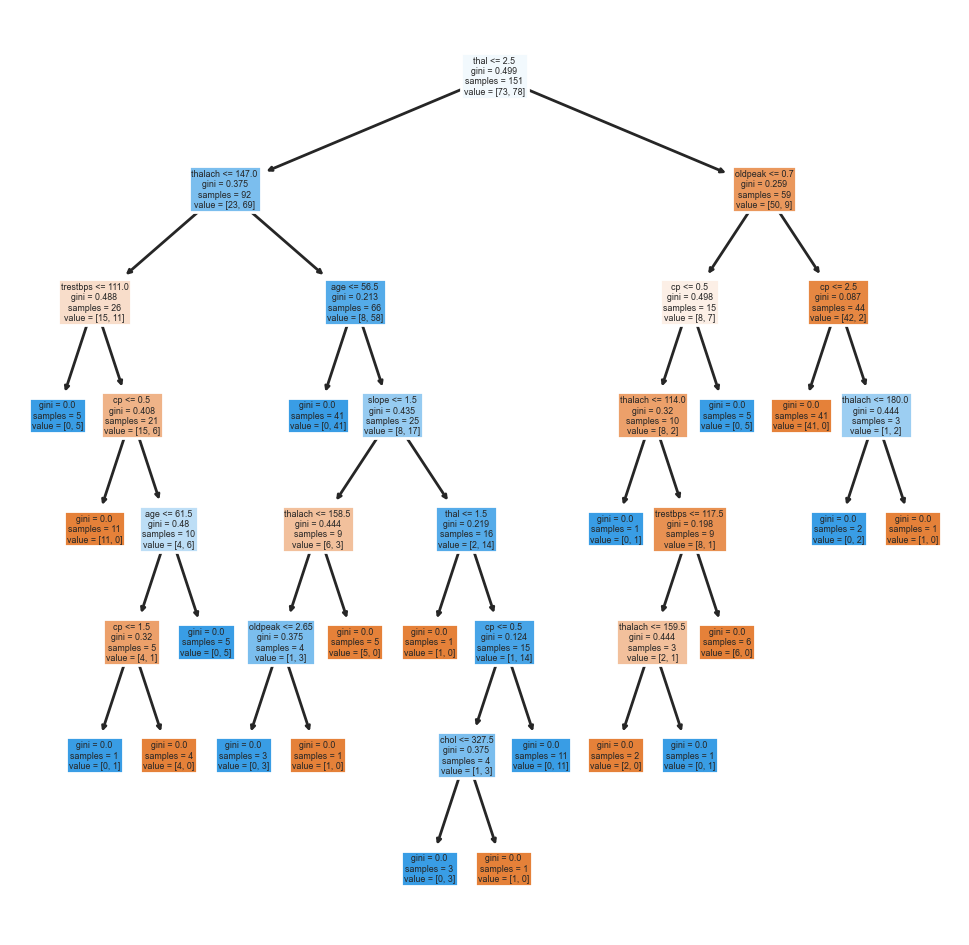

In [34]:
# Grabbed from: https://stackoverflow.com/questions/59174665/how-can-i-adjust-the-size-of-the-plot-tree-graph-in-sklearn-to-make-it-readable
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=200)
tree.plot_tree(model, feature_names = x.columns, filled=True);
plt.savefig("dec_tree")

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
confusion_matrix(ytest, y_predictions)

array([[44, 21],
       [22, 65]])

In [37]:
print(classification_report(ytest, y_predictions))

              precision    recall  f1-score   support

           0       0.67      0.68      0.67        65
           1       0.76      0.75      0.75        87

    accuracy                           0.72       152
   macro avg       0.71      0.71      0.71       152
weighted avg       0.72      0.72      0.72       152

